# Advanced Python Project :

## Introduction :

 This Project has Two Parts in part-1 we need to Scrap the Required data from the given website and the website is all about the Populatin details of all the countries in the world. The Given data has the multiple columns which contains different data like population , Yearly Change , Density ,land area , Migrants , Urban population , World share in population etc...
 where as in part-2 we just need to create classes with given Attributes and Methodes.

The column wise analasys of the data in part-1 is as follows 

 country name  - Stastically it was Nominal level data where  Python reads it as a String. 

 population    - stastically it was  Discrete data where Python reads it as an integer.

 Yearly Change - stastically it was continuous data where Python reads it as a float.

 Net Change    - stastically it was Discrete data where Python reads it as an integer.

 Density       - stastically it was continuous data where Python reads it as an integer.

 Land Area     - stastically it was continuous data where Python reads it as an integer.

 Migrants      - stastically it was Discrete data where Python reads it as an integer.

 Fertility Rate- stastically it was continuous data where Python reads it as an float.

 medium age    - stastically it was continuous data where Python reads it as an integer.

 Urban Pop     - stastically it was continuous data where Python reads it as an integer.
 
 world share   - stastically it was continuous data where Python reads it as an float.

# PART - 1 :

In [119]:
# Importing Required Libraries 
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Scrapping the html code of the web page using the required libraries

url = "https://www.worldometers.info/world-population/population-by-country/"
page = requests.get(url)
soup = BeautifulSoup(page.content,"html.parser")
print(page) # Checking whether we got response from the website or not

<Response [200]>


In [121]:
# By using above html code scrapping the table from the website by Row wise using find and find_all 
table = soup.find('table')
rows = table.find_all('tr')
rows_list = list()

for tr in rows:
  td = tr.find_all('td')
  row = [i.text for i in td]
  rows_list.append(row)

In [146]:
# assigning the scrapped table  to a data frame for doing data analysys by using pandas library
df = pd.DataFrame(rows_list,columns = ['S.no','Country(or dependency)','Population(2020)','Yearly Change','Net Change','Density','Land Area','Migrants','Fert rate','Med age','Urban pop %','World share'])
df.to_csv("popupation.csv",index = False)
population = pd.read_csv("popupation.csv")
population

,S.no,Country(or dependency),Population(2020),Yearly Change,Net Change,Density,Land Area,Migrants,Fert rate,Med age,Urban pop %,World share
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
2,2.0,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
3,3.0,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
4,4.0,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
...,...,...,...,...,...,...,...,...,...,...,...,...
231,231.0,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
232,232.0,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
233,233.0,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
234,234.0,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


###  Basic data cleaning

In [147]:
 # Removing the initial row because the row  has all nan values only and index position as 0 which dosen't make any sense
population = population.drop(population.index[[0]],axis = 0) # deleting row by using index position
population

,S.no,Country(or dependency),Population(2020),Yearly Change,Net Change,Density,Land Area,Migrants,Fert rate,Med age,Urban pop %,World share
1,1.0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
2,2.0,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
3,3.0,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
4,4.0,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
5,5.0,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
231,231.0,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
232,232.0,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
233,233.0,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
234,234.0,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [148]:
# removing s.no row because the data frame already has a index count by default
population = population.drop('S.no',axis = 1) 

In [149]:
population.head()

,Country(or dependency),Population(2020),Yearly Change,Net Change,Density,Land Area,Migrants,Fert rate,Med age,Urban pop %,World share
1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


# Attribute Analasis :

### 1) Please report the number of rows and columns

In [150]:
print("Total No of Rows in the table are : ",population.shape[0]) # finding no of rows
print("Total No of Columns in the table are : ",population.shape[1]) # finding no of columns

Total No of Rows in the table are :  235
Total No of Columns in the table are :  11


###2) Please report if there is any missing value in the dataset.

In [151]:
population.isnull().sum() # finding the count of null values 

Country(or dependency)    0
Population(2020)          0
Yearly Change             0
Net Change                0
Density                   0
Land Area                 0
Migrants                  0
Fert rate                 0
Med age                   0
Urban pop %               0
World share               0
dtype: int64

### Explanation :

The data above is showing that there are no any null values in the above data set

### 3) Please rename the columns appropriately.

In [152]:
# Renaming the columns  proparly 
population.rename(columns = {'Country(or dependency)':'Country_name','Population(2020)':'Population','Yearly Change':'Yearly_change_in_%','Net Change':'Yearly_change_in_no','Land Area':'Area','Fert rate':'Fertility_rate','Med age':'Median_age','Urban pop %':'Urban_population_%','World share':'World_share_in_population_%'},inplace = True)
population.head()

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


### Explanation :
All columns are renamed properly according to the data avilable.

### 4) Please report the top ten and bottom ten countries based on the density column.

In [153]:
# converting the dttype of column Density to numeric because it is reading as an object 
# where as "nlargest" function dosen't work if dttype is an object
population['Density'] =pd.to_numeric(population['Density'],errors='coerce') 

In [154]:
# TOP 10 Countries based on Density column
Top_10_Density = population.nlargest(10, columns=['Density'],keep='first') # using "nlargest" function to find top countries bassed on a column
Top_10_Density

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
191,Channel Islands,"173,863",0.93 %,"1,604",915.0,190,"1,351",1.5,43,30 %,0.00 %
121,State of Palestine,"5,101,414",2.41 %,"119,994",847.0,"6,020","-10,563",3.7,21,80 %,0.07 %
173,Micronesia,"548,914",1.00 %,"5,428",784.0,700,"-2,957",2.9,27,68 %,0.01 %
216,Saint Martin,"38,666",1.75 %,664,730.0,53,,N.A.,N.A.,0 %,0.00 %
187,Mayotte,"272,815",2.50 %,"6,665",728.0,375,0,3.7,20,46 %,0.00 %
57,Taiwan,"23,816,775",0.18 %,"42,899",673.0,"35,410","30,001",1.2,42,79 %,0.31 %
184,Barbados,"287,375",0.12 %,350,668.0,430,-79,1.6,40,31 %,0.00 %
109,Lebanon,"6,825,445",-0.44 %,"-30,268",667.0,"10,230","-30,012",2.1,30,78 %,0.09 %
157,Mauritius,"1,271,768",0.17 %,"2,100",626.0,"2,030",0,1.4,37,41 %,0.02 %
197,Aruba,"106,766",0.43 %,452,593.0,180,201,1.9,41,44 %,0.00 %


In [155]:
# Bottom 10 Countries based on Density column
Bottom_10_Density = population.nsmallest(10, columns=['Density'],keep='first') # using "nsmallest" function to find Bottom countries bassed on a column
Bottom_10_Density

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
209,Greenland,"56,770",0.17 %,98,0.0,"410,450",,N.A.,N.A.,87 %,0.00 %
232,Falkland Islands,"3,480",3.05 %,103,0.0,"12,170",,N.A.,N.A.,66 %,0.00 %
136,Mongolia,"3,278,290",1.65 %,"53,123",2.0,"1,553,560",-852,2.9,28,67 %,0.04 %
170,Western Sahara,"597,339",2.55 %,"14,876",2.0,"266,000","5,582",2.4,28,87 %,0.01 %
55,Australia,"25,499,884",1.18 %,"296,686",3.0,"7,682,300","158,246",1.8,38,86 %,0.33 %
143,Namibia,"2,540,905",1.86 %,"46,375",3.0,"823,290","-4,806",3.4,22,55 %,0.03 %
181,Iceland,"341,243",0.65 %,"2,212",3.0,"100,250",380,1.8,37,94 %,0.00 %
39,Canada,"37,742,154",0.89 %,"331,107",4.0,"9,093,510","242,032",1.5,41,81 %,0.48 %
108,Libya,"6,871,292",1.38 %,"93,840",4.0,"1,759,540","-1,999",2.3,29,78 %,0.09 %
145,Botswana,"2,351,627",2.08 %,"47,930",4.0,"566,730","3,000",2.9,24,73 %,0.03 %


### 5) Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.

In [156]:
# converting the dttype of column Fertility_rate to numeric because it is reading as an object 
# where as "nlargest" function dosen't work if dttype is an object
population['Fertility_rate'] =pd.to_numeric(population['Fertility_rate'],errors='coerce') 

In [157]:
Top_10_Fertility = population.nlargest(10, columns=['Fertility_rate'],keep='first')  # using "nlargest" function to find top countries bassed on a column
Top_10_Fertility

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
56,Niger,"24,206,644",3.84 %,"895,929",19.0,"1,266,700","4,000",7.0,15,17 %,0.31 %
73,Somalia,"15,893,222",2.92 %,"450,317",25.0,"627,340","-40,000",6.1,17,47 %,0.20 %
16,DR Congo,"89,561,403",3.19 %,"2,770,836",40.0,"2,267,050","23,861",6.0,17,46 %,1.15 %
60,Mali,"20,250,833",3.02 %,"592,802",17.0,"1,220,190","-40,000",5.9,16,44 %,0.26 %
72,Chad,"16,425,864",3.00 %,"478,988",13.0,"1,259,200","2,000",5.8,17,23 %,0.21 %
44,Angola,"32,866,272",3.27 %,"1,040,977",26.0,"1,246,700","6,413",5.6,17,67 %,0.42 %
78,Burundi,"11,890,784",3.12 %,"360,204",463.0,"25,680","2,001",5.5,17,14 %,0.15 %
7,Nigeria,"206,139,589",2.58 %,"5,175,990",226.0,"910,770","-60,000",5.4,18,52 %,2.64 %
144,Gambia,"2,416,668",2.94 %,"68,962",239.0,"10,120","-3,087",5.3,18,59 %,0.03 %
59,Burkina Faso,"20,903,273",2.86 %,"581,895",76.0,"273,600","-25,000",5.2,18,31 %,0.27 %


In [158]:
Bottom_10_Fertility = population.nsmallest(10, columns=['Fertility_rate'],keep='first') # using "nsmallest" function to find Bottom countries bassed on a column
Bottom_10_Fertility

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
28,South Korea,"51,269,185",0.09 %,"43,877",527.0,"97,230","11,731",1.1,44,82 %,0.66 %
57,Taiwan,"23,816,775",0.18 %,"42,899",673.0,"35,410","30,001",1.2,42,79 %,0.31 %
114,Singapore,"5,850,342",0.79 %,"46,005",NaN,700,"27,028",1.2,42,N.A.,0.08 %
141,Puerto Rico,"2,860,853",-2.47 %,"-72,555",323.0,"8,870","-97,986",1.2,44,N.A.,0.04 %
167,Macao,"649,335",1.39 %,"8,890",NaN,30,"5,000",1.2,39,N.A.,0.01 %
23,Italy,"60,461,826",-0.15 %,"-88,249",206.0,"294,140","148,943",1.3,47,69 %,0.78 %
30,Spain,"46,754,778",0.04 %,"18,002",94.0,"498,800","40,000",1.3,45,80 %,0.60 %
87,Greece,"10,423,054",-0.48 %,"-50,401",81.0,"128,900","-16,000",1.3,46,85 %,0.13 %
89,Portugal,"10,196,709",-0.29 %,"-29,478",111.0,"91,590","-6,000",1.3,46,66 %,0.13 %
104,Hong Kong,"7,496,981",0.82 %,"60,827",NaN,"1,050","29,308",1.3,45,N.A.,0.10 %


###Explanation :

By observing the above results we can say that country "Niger" has the Highest Fertility_rate(7.0) where as country "South Korea" has Lowest Fertility_rate(1.1)

### 6) Report top 5 largest countries in this word based on land area.

In [159]:
# converting the dttype of column Fertility_rate to numeric because it is reading as an object 
# where as "nlargest" function dosen't work if dttype is an object
population['Area'] =pd.to_numeric(population['Area'],errors='coerce')

In [160]:
Top_5_area = population.nlargest(5, columns=['Area'],keep='first')  # using "nlargest" function to find top countries bassed on a column
Top_5_area

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
188,Sao Tome & Principe,"219,159",1.91 %,"4,103",228.0,960.0,"-1,680",4.4,19,74 %,0.00 %
215,Turks and Caicos,"38,717",1.38 %,526,41.0,950.0,,NaN,N.A.,89 %,0.00 %
194,Kiribati,"119,449",1.57 %,"1,843",147.0,810.0,-800,3.6,23,57 %,0.00 %
152,Bahrain,"1,701,575",3.68 %,"60,403",NaN,760.0,"47,800",2.0,32,89 %,0.02 %
204,Dominica,"71,986",0.25 %,178,96.0,750.0,,NaN,N.A.,74 %,0.00 %


### 7) Report top 5 countries in this word based on a median value.


In [161]:
# converting the dttype of column Fertility_rate to numeric because it is reading as an object 
# where as "nlargest" function dosen't work if dttype is an object
population['Median_age'] =pd.to_numeric(population['Median_age'],errors='coerce')

In [162]:
Top_5_Median = population.nlargest(5, columns=['Median_age'],keep='first')  # using "nlargest" function to find top countries bassed on a column
Top_5_Median

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
11,Japan,"126,476,461",-0.30 %,"-383,840",347.0,NaN,"71,560",1.4,48.0,92 %,1.62 %
23,Italy,"60,461,826",-0.15 %,"-88,249",206.0,NaN,"148,943",1.3,47.0,69 %,0.78 %
180,Martinique,"375,265",-0.08 %,-289,354.0,NaN,-960,1.9,47.0,92 %,0.00 %
19,Germany,"83,783,942",0.32 %,"266,897",240.0,NaN,"543,822",1.6,46.0,76 %,1.07 %
87,Greece,"10,423,054",-0.48 %,"-50,401",81.0,NaN,"-16,000",1.3,46.0,85 %,0.13 %


### 8) Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.

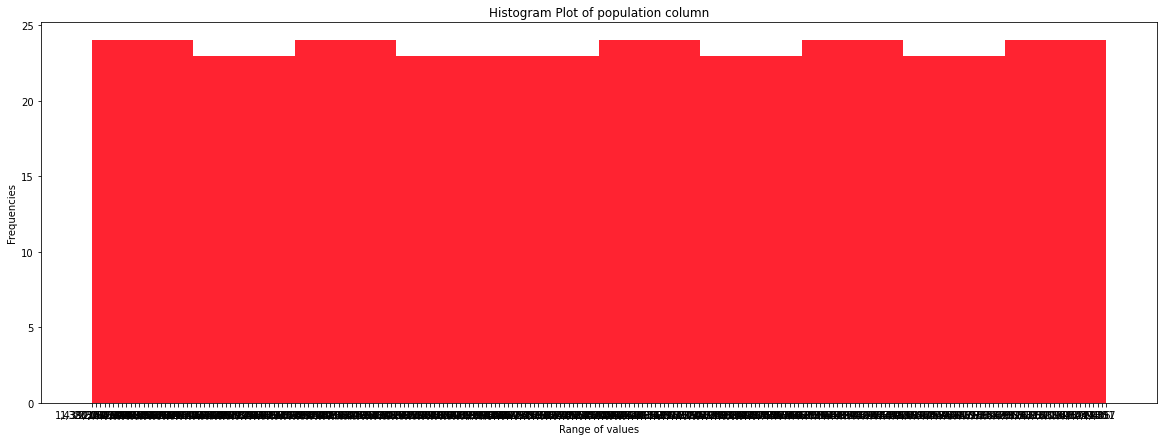

In [163]:
# Creating a histogram
# histogram to see the distribution of numerical data

fig = plt.figure(figsize =(20, 7))
plt.hist(population["Population"],color='#FF2331')
plt.title("Histogram Plot of population column")
plt.xlabel("Range of values")
plt.ylabel("Frequencies")
plt.grid(False)
plt.show()

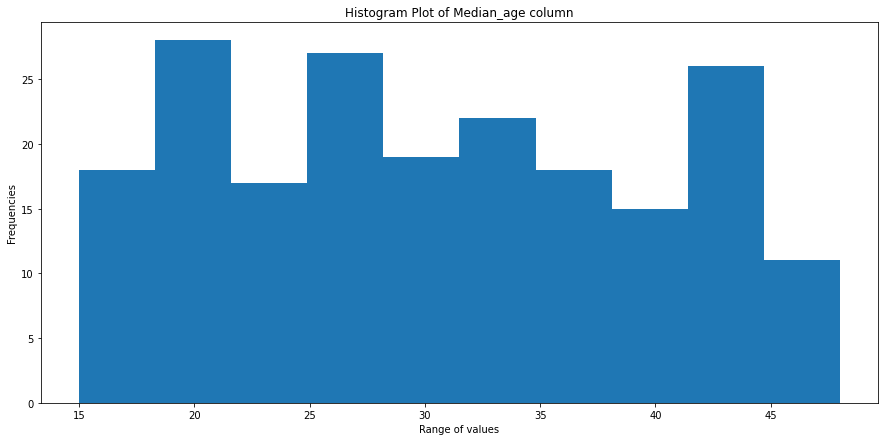

In [164]:
# Creating a histogram
# histogram to see the distribution of numerical data

fig = plt.figure(figsize =(15, 7))
plt.hist(population["Median_age"])
plt.title("Histogram Plot of Median_age column")
plt.xlabel("Range of values")
plt.ylabel("Frequencies")
plt.grid(False)
plt.show()

In [165]:
population['Median_age'].value_counts()

19.0    14
28.0    12
43.0    11
32.0    11
18.0    10
42.0    10
20.0     9
30.0     8
26.0     7
22.0     7
38.0     7
40.0     7
34.0     6
17.0     6
31.0     6
24.0     6
21.0     5
29.0     5
44.0     5
45.0     5
41.0     5
33.0     5
36.0     4
37.0     4
27.0     4
23.0     4
25.0     4
35.0     3
46.0     3
39.0     3
47.0     2
16.0     1
15.0     1
48.0     1
Name: Median_age, dtype: int64

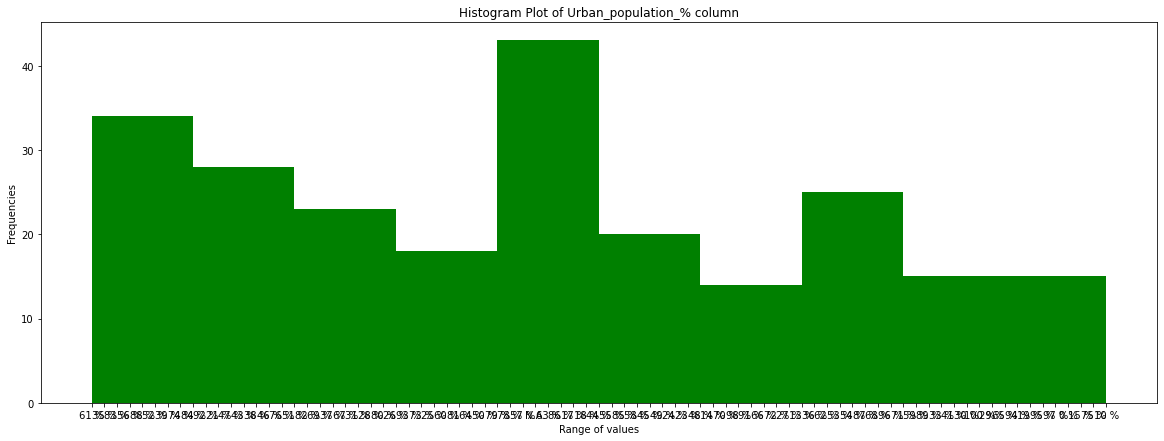

In [166]:
# Creating a histogram
# histogram to see the distribution of numerical data

fig = plt.figure(figsize =(20, 7))
plt.hist(population["Urban_population_%"],color = 'Green')
plt.title("Histogram Plot of Urban_population_% column")
plt.xlabel("Range of values")
plt.ylabel("Frequencies")
plt.grid(False)
plt.show()

In [167]:
population['Urban_population_%'].value_counts()

N.A.    13
57 %     7
88 %     7
87 %     6
63 %     6
        ..
50 %     1
81 %     1
28 %     1
37 %     1
10 %     1
Name: Urban_population_%, Length: 81, dtype: int64

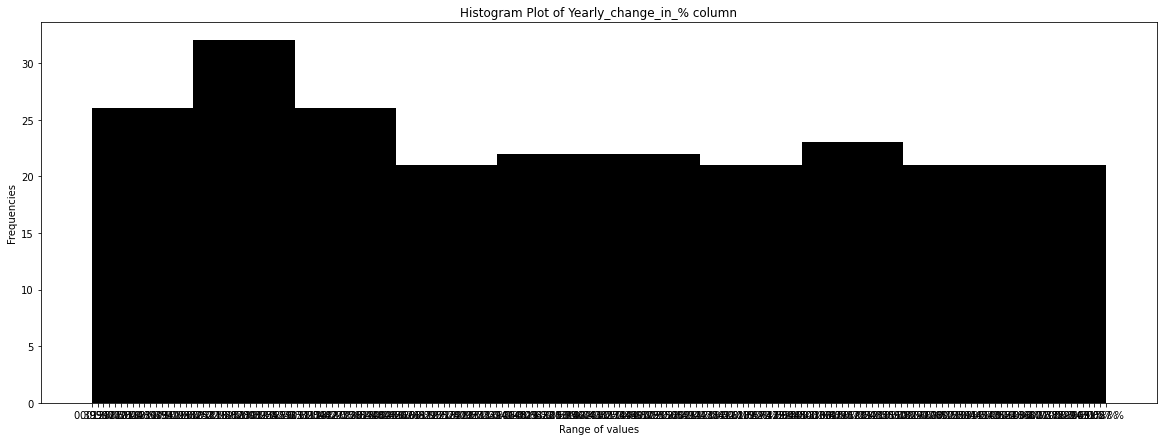

In [168]:
# Creating a histogram
# histogram to see the distribution of numerical data

fig = plt.figure(figsize =(20, 7))
plt.hist(population["Yearly_change_in_%"],color = 'Black')
plt.title("Histogram Plot of Yearly_change_in_% column")
plt.xlabel("Range of values")
plt.ylabel("Frequencies")
plt.grid(False)
plt.show()

In [169]:
population['Yearly_change_in_%'].value_counts()

1.48 %    4
0.44 %    3
0.67 %    3
0.97 %    3
0.25 %    3
         ..
2.73 %    1
2.83 %    1
2.92 %    1
3.00 %    1
1.27 %    1
Name: Yearly_change_in_%, Length: 174, dtype: int64

### Explanation :

By analysing the above figure we can say that we didn't got proper distribution because the data given is very large to draw the Histrogram plot which is the only plot we use to say the Distribution of a column. 
So by using function "value_counts" we can get the data we want. 

### 9) Please sort the population column based on the lowest populated countries and report the bottom 10 countries as well as the top 10 countries.

In [170]:
# sorting the data by population column by using sort_values function
sorted_pop = population.sort_values('Population',ascending =True) 
sorted_pop

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
159,Eswatini,"1,160,164",1.05 %,"12,034",67.0,NaN,"-8,353",3.0,21.0,30 %,0.01 %
158,Cyprus,"1,207,359",0.73 %,"8,784",131.0,NaN,"5,000",1.3,37.0,67 %,0.02 %
157,Mauritius,"1,271,768",0.17 %,"2,100",626.0,NaN,0,1.4,37.0,41 %,0.02 %
156,Timor-Leste,"1,318,445",1.96 %,"25,326",89.0,NaN,"-5,385",4.1,21.0,33 %,0.02 %
155,Estonia,"1,326,535",0.07 %,887,31.0,NaN,"3,911",1.6,42.0,68 %,0.02 %
...,...,...,...,...,...,...,...,...,...,...,...
92,Honduras,"9,904,607",1.63 %,"158,490",89.0,NaN,"-6,800",2.5,24.0,57 %,0.13 %
15,Vietnam,"97,338,579",0.91 %,"876,473",314.0,NaN,"-80,000",2.1,32.0,38 %,1.25 %
201,Antigua and Barbuda,"97,929",0.84 %,811,223.0,440.0,0,2.0,34.0,26 %,0.00 %
200,Seychelles,"98,347",0.62 %,608,214.0,460.0,-200,2.5,34.0,56 %,0.00 %


In [171]:
# Displaying Top 10 countries using head() function after sorting  
Top_10_pop_sorted = sorted_pop.head(10)
Top_10_pop_sorted

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
159,Eswatini,"1,160,164",1.05 %,"12,034",67.0,NaN,"-8,353",3.0,21.0,30 %,0.01 %
158,Cyprus,"1,207,359",0.73 %,"8,784",131.0,NaN,"5,000",1.3,37.0,67 %,0.02 %
157,Mauritius,"1,271,768",0.17 %,"2,100",626.0,NaN,0,1.4,37.0,41 %,0.02 %
156,Timor-Leste,"1,318,445",1.96 %,"25,326",89.0,NaN,"-5,385",4.1,21.0,33 %,0.02 %
155,Estonia,"1,326,535",0.07 %,887,31.0,NaN,"3,911",1.6,42.0,68 %,0.02 %
234,Tokelau,"1,357",1.27 %,17,136.0,10.0,,NaN,NaN,0 %,0.00 %
2,India,"1,380,004,385",0.99 %,"13,586,631",464.0,NaN,"-532,687",2.2,28.0,35 %,17.70 %
154,Trinidad and Tobago,"1,399,488",0.32 %,"4,515",273.0,NaN,-800,1.7,36.0,52 %,0.02 %
153,Equatorial Guinea,"1,402,985",3.47 %,"46,999",50.0,NaN,"16,000",4.6,22.0,73 %,0.02 %
1,China,"1,439,323,776",0.39 %,"5,540,090",153.0,NaN,"-348,399",1.7,38.0,61 %,18.47 %


In [172]:
# Displaying Bottom 10 countries using tail() function after sorting  
Bottom_10_pop_sorted = sorted_pop.tail(10)
Bottom_10_pop_sorted

,Country_name,Population,Yearly_change_in_%,Yearly_change_in_no,Density,Area,Migrants,Fertility_rate,Median_age,Urban_population_%,World_share_in_population_%
96,Belarus,"9,449,323",-0.03 %,"-3,088",47.0,NaN,"8,730",1.7,40.0,79 %,0.12 %
95,Tajikistan,"9,537,645",2.32 %,"216,627",68.0,NaN,"-20,000",3.6,22.0,27 %,0.12 %
94,Hungary,"9,660,351",-0.25 %,"-24,328",107.0,NaN,"6,000",1.5,43.0,72 %,0.12 %
228,Saint Barthelemy,"9,877",0.30 %,30,470.0,21.0,,NaN,NaN,0 %,0.00 %
93,United Arab Emirates,"9,890,402",1.23 %,"119,873",118.0,NaN,"40,000",1.4,33.0,86 %,0.13 %
92,Honduras,"9,904,607",1.63 %,"158,490",89.0,NaN,"-6,800",2.5,24.0,57 %,0.13 %
15,Vietnam,"97,338,579",0.91 %,"876,473",314.0,NaN,"-80,000",2.1,32.0,38 %,1.25 %
201,Antigua and Barbuda,"97,929",0.84 %,811,223.0,440.0,0,2.0,34.0,26 %,0.00 %
200,Seychelles,"98,347",0.62 %,608,214.0,460.0,-200,2.5,34.0,56 %,0.00 %
160,Djibouti,"988,000",1.48 %,"14,440",43.0,NaN,900,2.8,27.0,79 %,0.01 %


# Part - 2 :

###Q1) Standard -

Attributes: Std name, No of enrolled students, Overall GPA


Methods: getStd, getEnrolled, getOGPA

In [173]:
# Creating a class standard with given Attributes and Methodes
class STANDARD:
  def __init__(self,std_name,No_of_students,overall_GPA): # instance variables given 
    self.std_name = std_name
    self.No_of_students = No_of_students
    self.overall_GPA = overall_GPA
  # Creating Methodes Asked 
  def getStd(self):                               
    return f'student name is {self.std_name}'
  def getEnrolled(self):
    return f'Total number of students enrolled are {self.No_of_students}'
  def getOGPA(self):
    return f'Overall GPA of students is {self.overall_GPA}'

standard = STANDARD('Sitaram',5,8)
print(standard.getStd())
print(standard.getEnrolled())
print(standard.getOGPA())
  

student name is Sitaram
Total number of students enrolled are 5
Overall GPA of students is 8


## Q2)Students class - 

Attributes: Name,Roll No., Standard, Math marks, English Marks, Science Marks, Social Marks


Methods: getName, getRollNo, getStd, getGPA

In [174]:
# Creating a class students with given Attributes and Methodes
class STUDENTS:
   def __init__(self,Name,Roll_No,Standard,English_Marks,Science_Marks,Social_Marks): # instance variables given
    self.Name = Name 
    self.Roll_No = Roll_No
    self.Standard=Standard
    self.English_Marks=English_Marks
    self.Science_Marks=Science_Marks
    self.Social_Marks=Social_Marks
   # Creating Methodes Asked 
   def getName(self):
    return f'Student name is {self.Name}'
   def getRollNo(self):
    return f'student Roll number is {self.Roll_No}'
   def getSTD(self):
    return f"student is studying {self.Standard}'th standard"
   def getGPA(self):
    return f'student GPA is {((self.English_Marks + self.Science_Marks +self.Social_Marks)/30)*10}'
students =STUDENTS('Sitaram',9,12,7,8,9)
print(students.getName())
print(students.getRollNo())
print(students.getSTD())
print(students.getGPA())


Student name is Sitaram
student Roll number is 9
student is studying 12'th standard
student GPA is 8.0
